In [1]:
#alllogs = !find . -name log\* | grep -v checkpoint

In [2]:
from sys import path
path.insert(0,'../')
import benchmark

In [3]:
# fulldata={}
# for logfile in alllogs:
#     try:
#         fulldata[logfile] = benchmark.log_spec(logfile)
#     except Exception as e:
#         print(logfile, str(e))

In [4]:
# from pandas import DataFrame
# df=DataFrame(fulldata).T
# df.to_csv('H2O-PVC.csv')

In [5]:
from pandas import read_csv
df=read_csv('H2O-PVC.csv',index_col=0)

In [6]:
categories=['-CPU/','SYCLCPU/','GPU/']

In [7]:
aggregate=[('Communications',['Communications']),
           ('FFT & Convolutions',['Convolutions','PS Computation','Potential']),
           ('Linear Algebra',['BLAS-LAPACK', 'Linear Algebra']),
           ('Other',['Flib LowLevel','Unknown', 'Other'])]

In [8]:
aggregate_comm=[('Fock',['Wait','Send','Recv']),
                (r'$\rho$ & $V$',['Allreduce, Large Size', 'Rho_commun', 'Pot_commun', 'Allgatherv','Allgather','PSolver Communication']),
                (r'$\psi$',['Un-TransComm']),
                #('Linalg',['LagrM_commun','Chol_commun']),
                ('Control',['Allreduce, Small Size','LagrM_commun','Chol_commun'])]

In [9]:
from futile import Time as T

In [10]:
tts=[]
dfts=[]
for spu in categories:
    dfts.append(benchmark.df_select(df,{'Hostname':'compute',
              'name':'H2O-32',
                 0:spu
                 }).sort_values(by='MPI'))
    tts.append(T.TimeData(*dfts[-1]['timefile'],widgets=False,only_last=True))

./H2O-CPU/1node/log-H2O-32.yaml     16
./H2O-CPU/2node/log-H2O-32.yaml     32
./H2O-CPU/4node/log-H2O-32.yaml     64
./H2O-CPU/8node/log-H2O-32.yaml    128
Name: MPI, dtype: int64
./H2O-SYCLCPU/1node/log-H2O-32.yaml     16
./H2O-SYCLCPU/2node/log-H2O-32.yaml     32
./H2O-SYCLCPU/4node/log-H2O-32.yaml     64
./H2O-SYCLCPU/8node/log-H2O-32.yaml    128
Name: MPI, dtype: int64


['(7.2', '7.7', '6.6)', 4.4, 4.3, 4.0, 3.3]

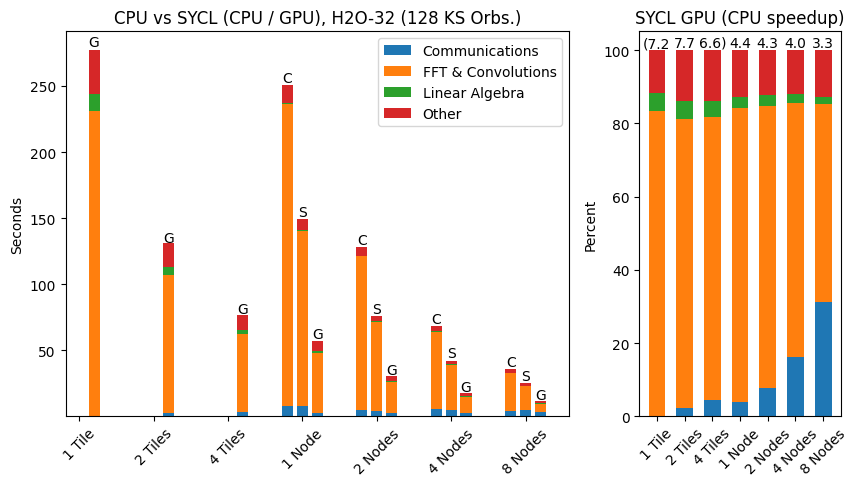

In [11]:
from matplotlib.pyplot import subplots
fig,axs=subplots(1,2,figsize=(10,5),width_ratios=(5,2))
wt=0.2
wt2=wt-0.05
ttt=tts[0]
ax=axs[0]
print(dfts[0]['MPI'])
ax=benchmark.draw_barplot(ttt.ids,ttt.actual_data,width=wt2,x=[3,4,5,6],shift=-wt,ax=ax,
                annotations=len(ttt.ids)*['C'],aggregate=aggregate)
#ax.set_title('CPU')
ax.legend(loc='best')
ttt=tts[1]
print(dfts[1]['MPI'])
ax=benchmark.draw_barplot(ttt.ids,ttt.actual_data,width=wt2,x=[3,4,5,6],ax=ax,
                annotations=len(ttt.ids)*['S'],aggregate=aggregate)
ttt=tts[2]
ids=['1 Tile','2 Tiles','4 Tiles', '1 Node', '2 Nodes','4 Nodes','8 Nodes']
ax=benchmark.draw_barplot(ids,ttt.actual_data,width=wt2,shift=wt,ax=ax,
                annotations=len(ttt.ids)*['G'],aggregate=aggregate)
ax.set_title('CPU vs SYCL (CPU / GPU), H2O-32 (128 KS Orbs.)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_ylabel('Seconds')
ttt=T.TimeData(*dfts[2]['timefile'],widgets=False,plottype='Percent',only_last=True)
ax2=axs[1] #None #ax.twinx()
CPU=tts[0].actual_data[1]
GPU=tts[2].actual_data[1]
c=CPU[0]
labels=[('(' if i ==0 else '')+str(round(f*c/g,1))+(')'if i ==2 else'')
        for i, (f, g )in enumerate(zip([8,4,2],GPU[:3]))] + [round(c/g,1)
                                                             for c,g in zip(CPU,GPU[-4:])]
ax2=benchmark.draw_barplot(ttt.ids,ttt.actual_data,width=0.6,shift=0,ax=ax2,labels=labels,
                 aggregate=aggregate)
ax2.set_title('SYCL GPU (CPU speedup)')
ax2.set_xticklabels(ax.get_xticklabels(),rotation=45)#,ha='right')
ax2.set_ylabel('Percent')
labels

./H2O-GPU/1Tile/log-H2O-32.yaml     1
./H2O-GPU/2Tile/log-H2O-32.yaml     2
./H2O-GPU/4Tile/log-H2O-32.yaml     4
./H2O-GPU/1node/log-H2O-32.yaml     8
./H2O-GPU/2node/log-H2O-32.yaml    16
./H2O-GPU/4node/log-H2O-32.yaml    32
./H2O-GPU/8node/log-H2O-32.yaml    64
Name: MPI, dtype: int64


/tmp/ipykernel_54622/2113865848.py:42: RuntimeWarning: divide by zero encountered in divide
  to_pc=100.0/sum(a[1] for a in ttt.actual_data[0])
/tmp/ipykernel_54622/2113865848.py:46: RuntimeWarning: invalid value encountered in multiply
  new_data.append((name,dt*to_pc))


(0.5, 6.5)

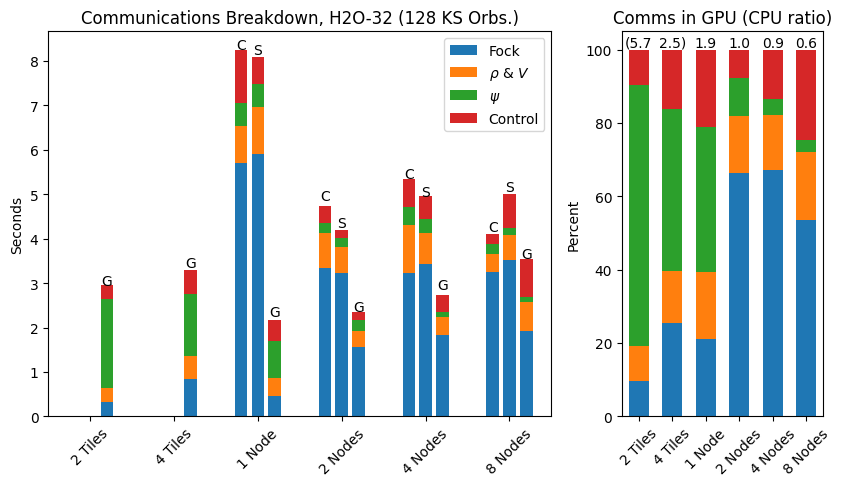

In [12]:
from numpy import array
tts=[]
dfts=[]
for spu in categories:
    dfts.append(benchmark.df_select(df,{'Hostname':'compute',
              'name':'H2O-32',
                 0:spu
                 }).sort_values(by='MPI'))
    tmp=T.TimeData(*dfts[-1]['timefile'],widgets=False,only_last=True)
    tmp.inspect_category('Communications')
    tts.append(tmp)
from matplotlib.pyplot import subplots
fig,axs=subplots(1,2,figsize=(10,5),width_ratios=(5,2))
wt=0.2
wt2=wt-0.05
ttt=tts[0]
ax=axs[0]
ax=benchmark.draw_barplot(ttt.ids,ttt.actual_data,width=wt2,x=[3,4,5,6],shift=-wt,ax=ax,
                annotations=len(ttt.ids)*['C'],aggregate=aggregate_comm)
#ax.set_title('CPU')
ax.legend(loc='best')
ttt=tts[1]
ax=benchmark.draw_barplot(ttt.ids,ttt.actual_data,width=wt2,x=[3,4,5,6],ax=ax,
                annotations=len(ttt.ids)*['S'],aggregate=aggregate_comm)
ttt=tts[2]
ids=['1 Tile','2 Tiles','4 Tiles', '1 Node', '2 Nodes','4 Nodes','8 Nodes']
ax=benchmark.draw_barplot(ids,ttt.actual_data,width=wt2,shift=wt,ax=ax,
                annotations=len(ttt.ids)*['G'],aggregate=aggregate_comm)
ax.set_title('Communications Breakdown, H2O-32 (128 KS Orbs.)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_ylabel('Seconds')
ax.set_xlim([0.5,6.5])
ttt=T.TimeData(*dfts[2]['timefile'],widgets=False,plottype='Percent',only_last=True)
ttt.inspect_category('Communications')
ax2=axs[1] #None #ax.twinx()
CPU=tts[0].actual_data[1]
GPU=tts[2].actual_data[1]
c=CPU[0]
labels=[('(' if i ==1 else '')+str(round(f*c/(2*g),1))+(')'if i ==2 else'')
        for i, (f, g )in enumerate(zip([8,4,2],GPU[:3]))] + [round(c/(2*g),1)
                                                             for c,g in zip(CPU,GPU[-4:])]
to_pc=100.0/sum(a[1] for a in ttt.actual_data[0])
new_data=[]
for name,dt in ttt.actual_data[0]:
    #dt *= to_pc
    new_data.append((name,dt*to_pc))
print(dfts[2]['MPI'])
ax2=benchmark.draw_barplot(ttt.ids,(new_data,array(ttt.actual_data[1])*to_pc),width=0.6,shift=0,ax=ax2,labels=labels,
                 aggregate=aggregate_comm)
ax2.set_title('Comms in GPU (CPU ratio)')
ax2.set_xticklabels(ax.get_xticklabels(),rotation=45)#,ha='right')
ax2.set_ylabel('Percent')
ax2.set_xlim([0.5,6.5])